# Processing timelapse data
This notebook demonstrates how to process timelapse data frame-by-frame.

In [1]:
from skimage.io import imread, imsave
import pyclesperanto_prototype as cle
import numpy as np

First, we should define the origin of the data we want to process and where the results should be saved to.

In [2]:
input_file = "../../data/CalibZAPWfixed_000154_max.tif"
output_file = "../../data/CalibZAPWfixed_000154_max_labels.tif"

Next, we open the dataset and see what image dimensions it has.

In [3]:
timelapse = imread(input_file)
timelapse.shape

(100, 235, 389)

If it is not obvious which dimension is the time dimension, it is recommended to slice the dataset in different directions.

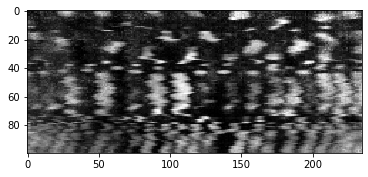

In [4]:
cle.imshow(timelapse[:,:,150])

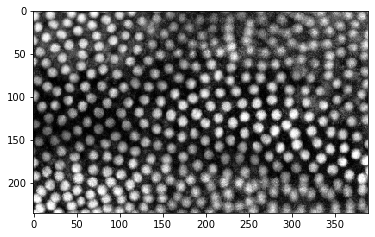

In [5]:
cle.imshow(timelapse[50,:,:])

Obviously, the time dimension is the first dimension (index 0).

Next, we define the image processing workflow we want to apply to our dataset. It is recommended to do this in a function so that we can later reuse it without copy&pasting everything.

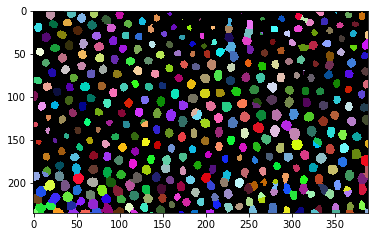

In [6]:
def process_image(image, 
                  # define default parameters for the procedure
                  background_subtraction_radius=10, 
                  spot_sigma=1, 
                  outline_sigma=1):
    """Segment nuclei in an image and return labels"""
    # pre-process image
    background_subtracted = cle.top_hat_box(image, 
                  radius_x=background_subtraction_radius, 
                  radius_y=background_subtraction_radius)
    
    # segment nuclei
    labels = cle.voronoi_otsu_labeling(background_subtracted,
                  spot_sigma=spot_sigma,
                  outline_sigma=outline_sigma)

    return labels

# Try out the function
single_timepoint = timelapse[50]
segmented = process_image(single_timepoint)

# Visualize result
cle.imshow(segmented, labels=True)

After we made this function work on a single timepoint, we should program a for-loop that goes through the timelapse, applies the procedure to a couple of image and visualizes the results. Note: We go in steps of 10 images through the timelapse, to get an overview.

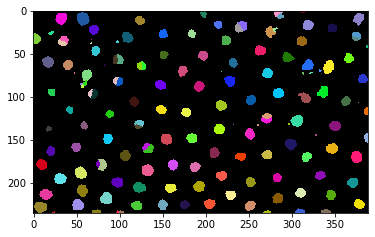

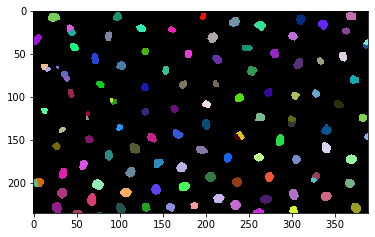

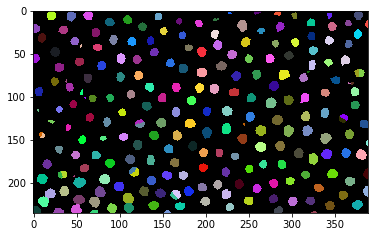

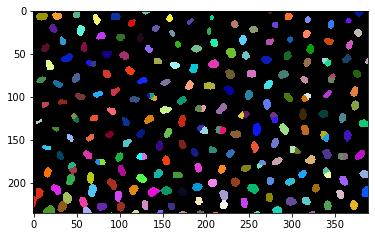

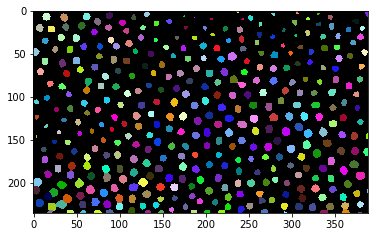

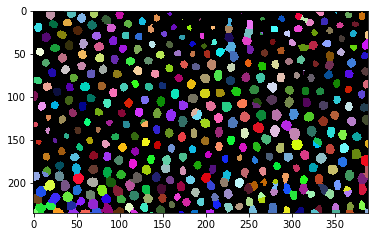

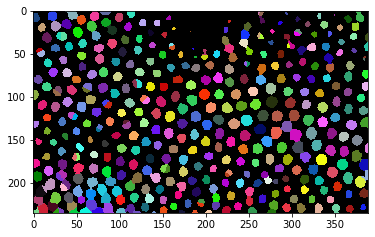

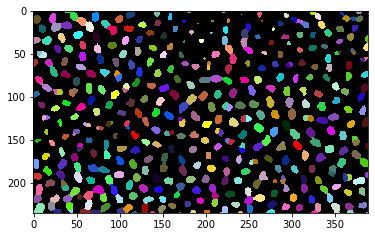

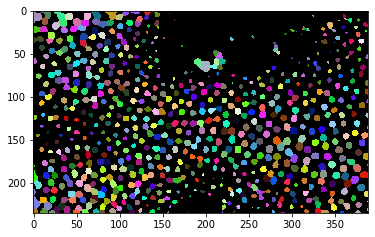

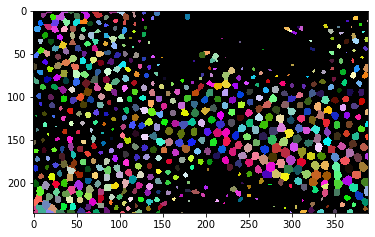

In [7]:
max_t = timelapse.shape[0]
for t in range(0, max_t, 10):
    label_image = process_image(timelapse[t])
    cle.imshow(label_image, labels=True)

When we are convinced that the procedure works, we can apply it to the whole timelapse, collect the results in a list and save it as stack to disc.

In [8]:
label_timelapse = []
for t in range(0, max_t):
    label_image = process_image(timelapse[t])
    label_timelapse.append(label_image)
    
# convert list of 2D images to 3D stack
np_stack = np.asarray(label_timelapse)

# save result to disk
imsave(output_file, np_stack)

C:\Users\rober\AppData\Local\Temp\ipykernel_27924\219181406.py:10: UserWarning: ../../data/CalibZAPWfixed_000154_max_labels.tif is a low contrast image
  imsave(output_file, np_stack)


Just to be sure that everything worked nicely, we reopen the dataset and print its dimensionality. It's supposed to be identical to the original `timelapse` dataset.

In [9]:
result = imread(output_file)

result.shape

(100, 235, 389)

In [10]:
timelapse.shape

(100, 235, 389)